In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings("ignore")

c:\Users\kmk45\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Toy Dataset - 1

wine = load_wine()
print(wine.keys())

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# Checking class_basic
wine_class = dict(zip(df.target.unique(), wine.target_names))
wine_class

{0: 'class_0', 1: 'class_1', 2: 'class_2'}

In [4]:
# Toy Dataset - 2
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
print(X_cancer.shape, y_cancer.shape)

(569, 30) (569,)


In [5]:
X = df[['malic_acid', 'ash']]
y = df['target']

# Create train set & test set
X_train, X_test, y_train, y_test = train_test_split(X_cancer[:, :2], y_cancer, 
                                                    test_size=0.25,
                                                    random_state=1999)

In [6]:
# Classification
# (1) KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
print(knn.fit(X_train, y_train), knn.score(X_test, y_test))

pred = knn.predict([[20, 4.3]])
print(wine_class[pred[0]])

KNeighborsClassifier() 0.916083916083916
class_1


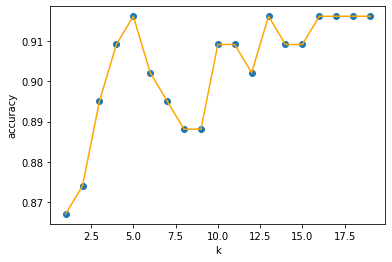

In [7]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.plot(k_range, scores, c='orange')
# plt.xticks([0,5,10,15,20])

In [8]:
# Need to consider each columns' scale -> put the data into the same scale
# Scaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer

scaler1 = MinMaxScaler()
scaler2 = MaxAbsScaler()
scaler3 = StandardScaler()
scaler4 = RobustScaler()
scaler5 = Normalizer()
scaler6 = QuantileTransformer() 
# scaler7 = PowerTransformer()

# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-max-abs-scaler-section

In [9]:
for scaler in [scaler1, scaler2, scaler3, scaler4, scaler5, scaler6]:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    print(f'score with {scaler}: {score:.2f}')
    
    # plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])

score with MinMaxScaler(): 0.92
score with MaxAbsScaler(): 0.92
score with StandardScaler(): 0.92
score with RobustScaler(): 0.91
score with Normalizer(): 0.58
score with QuantileTransformer(): 0.91


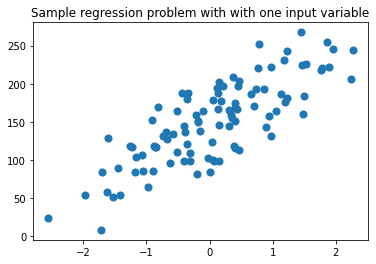

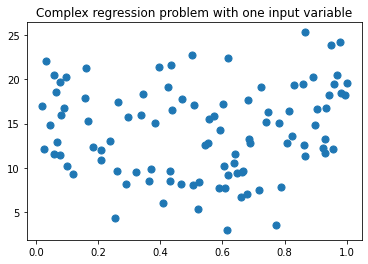

In [10]:
# Regression 
# (1-1) KNN-Regressor

from sklearn.datasets import make_regression, make_friedman1
plt.figure()
plt.title('Sample regression problem with with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1,
                            n_informative = 1, bias = 150.0,
                            noise = 30, random_state = 0)
plt.scatter(X_R1, y_R1, marker = 'o', s = 50)
plt.show()

plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state = 0)

plt.scatter(X_F1[:,2], y_F1, marker = 'o', s = 50)
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsRegressor

x_train, x_test, y_train, y_test = train_test_split(X_R1, y_R1, 
                                                    random_state = 0)
knnreg =KNeighborsRegressor(n_neighbors = 5).fit(x_train, y_train)
print('R-squared test score: {:.3f}'.format(knnreg.score(x_test, y_test)))

R-squared test score: 0.425


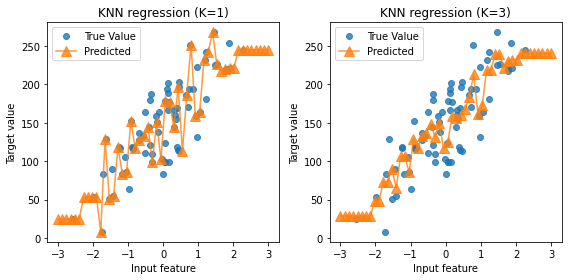

In [12]:
fig, subaxes = plt.subplots(1, 2, figsize = (8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                    random_state = 0)
for ax, K in zip(subaxes, [1,3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    # ax.set_xlim([-2.5, 0.75])
    ax.plot(X_train, y_train, 'o', label = 'True Value', alpha = 0.8)
    ax.plot(X_predict_input, y_predict_output, 
                  marker = '^', markersize = 10,
                  label = 'Predicted', alpha = 0.8)
    ax.set_xlabel('Input feature')
    ax.set_ylabel('Target value')
    ax.set_title('KNN regression (K={})'.format(K))
    ax.legend()
plt.tight_layout()

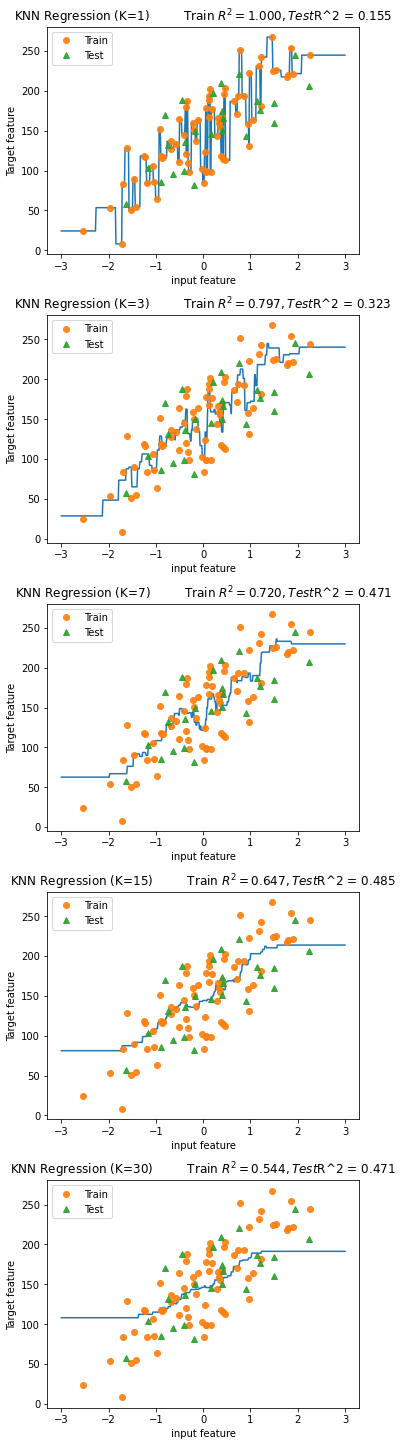

In [13]:
fig, subaxes = plt.subplots(5, 1, figsize = (5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for ax, K in zip(subaxes, [1, 3, 7, 15, 30]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    ax.plot(X_predict_input, y_predict_output)
    ax.plot(X_train, y_train, 'o', alpha = 0.9, label = 'Train')
    ax.plot(X_test, y_test, '^', alpha = 0.9, label = 'Test')
    ax.set_xlabel('input feature')
    ax.set_ylabel('Target feature')
    ax.set_title('KNN Regression (K={}) \
        Train $R^2 = {:.3f}, Test $R^2 = {:.3f}'.format(K, train_score, test_score))
    ax.legend()
    plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 1.0)

linear model coef (w): 45.70870464553658
linear model intercept (b): 148.446
R-squared score (train) : 0.679
R-squared score (test) : 0.492


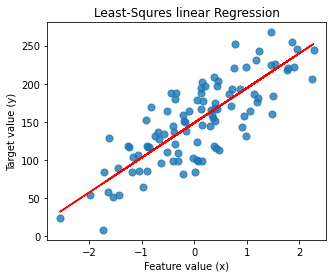

In [14]:
# (2) LinearRegression

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, 
                                                   random_state = 0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('linear model coef (w): {}'.format(linreg.coef_[0]))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (train) : {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test) : {:.3f}' .format(linreg.score(X_test, y_test)))

plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker = 'o', s = 50, alpha = 0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, '-r')
plt.title('Least-Squres linear Regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [15]:
# (3) Ridge regression w/ parameter = alpha
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge

dataset = fetch_california_housing()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0)

# Scaler 도입
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# Ridge linear Regression
linridge = Ridge(alpha = 20.0).fit(X_train_scaled, y_train)
print('ridge model intercept: {}'.format(linridge.intercept_))
print('ridge model coeff: {:.3f}'.format(linridge.coef_[0]))
print('R^2 score (training): {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R^2 score (test): {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

print('\nRidge regression: effect of alpha parameter')

for a in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = a).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
        \nr-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(a, num_coeff_bigger, r2_train, r2_test))

ridge model intercept: 3.057981185248998
ridge model coeff: 5.341
R^2 score (training): 0.593
R^2 score (test): 0.571
Number of non-zero features: 8

Ridge regression: effect of alpha parameter
Alpha = 0.00
num abs(coeff) > 1.0: 6,         
r-squared training: 0.61, r-squared test: 0.59

Alpha = 1.00
num abs(coeff) > 1.0: 6,         
r-squared training: 0.61, r-squared test: 0.58

Alpha = 10.00
num abs(coeff) > 1.0: 4,         
r-squared training: 0.60, r-squared test: 0.58

Alpha = 20.00
num abs(coeff) > 1.0: 3,         
r-squared training: 0.59, r-squared test: 0.57

Alpha = 50.00
num abs(coeff) > 1.0: 3,         
r-squared training: 0.57, r-squared test: 0.55

Alpha = 100.00
num abs(coeff) > 1.0: 3,         
r-squared training: 0.53, r-squared test: 0.52

Alpha = 1000.00
num abs(coeff) > 1.0: 1,         
r-squared training: 0.21, r-squared test: 0.21



In [16]:
# (4) Lasso regression w/ parameter = alpha
from sklearn.linear_model import Lasso

dataset = fetch_california_housing()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha = 0.0, max_iter=1000).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff: {}'.format(linlasso.coef_))
print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'.format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted(list(zip(list(X_R1), linlasso.coef_)),
                key = lambda e: - abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))
print('\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\n\
         Features kept: {}, \n\
         r-squared training: {:.2f}, \n\
         r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

lasso regression linear model intercept: 3.700509368046677
lasso regression linear model coeff: [  6.36690793   0.48953098 -14.57337746  20.80436379  -0.27232896
  -2.68838086  -3.9272944   -4.3233692 ]
Non-zero features: 8
R-squared score (training): 0.611
R-squared score (test): 0.591

Features with non-zero weight (sorted by absolute magnitude):
	[-0.81314628], 20.804
	[0.40234164], -14.573
	[-0.35955316], 6.367
	[0.42833187], -4.323
	[-0.97727788], -3.927
	[0.44386323], -2.688
	[0.97663904], 0.490
	[-0.88778575], -0.272


Alpha = 0.50
         Features kept: 0, 
         r-squared training: 0.00, 
         r-squared test: -0.00

Alpha = 1.00
         Features kept: 0, 
         r-squared training: 0.00, 
         r-squared test: -0.00

Alpha = 2.00
         Features kept: 0, 
         r-squared training: 0.00, 
         r-squared test: -0.00

Alpha = 3.00
         Features kept: 0, 
         r-squared training: 0.00, 
         r-squared test: -0.00

Alpha = 5.00
         Features k

In [17]:
# (5) Linear Regression w/ Polynomial Features

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_F1_poly = poly.fit_transform(X_F1)
X_train, X_test, y_train, y_test =  train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)
print('(poly deg 2) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'.format(linreg.score(X_test, y_test)))

ridge = Ridge().fit(X_train, y_train)
print('(poly deg 2 + ridge) linear model coeff (w):\n{}'.format(ridge.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'.format(ridge.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'.format(ridge.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'.format(ridge.score(X_test, y_test)))

(poly deg 2) linear model coeff (w):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805

(poly deg 2 + ridge) linear model coeff (w):
[ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.6291495

In [18]:
# (6) Logistic Regression
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, 
                                                    test_size= 0.25,
                                                    random_state = 0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic = LogisticRegression().fit(X_train_scaled, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logistic.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logistic.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.96


In [27]:
from lr import Logsitic_Regression
clf = Logsitic_Regression(lr=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

def accuaracy(y_test, y_pred):
    return sum(y_test == y_pred) /len(y_test)

accuaracy(y_test, y_pred)

0.9230769230769231

In [ ]:
# (Classification) 7. Support Vector Machine
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report 

X_train, X_test, y_train, y_test = train_test_split(X_cancer[0:, :2], y_cancer, 
                                                    random_state = 0) # variables: 2

svc = SVC(kernel = 'poly', C=1.0).fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(sum(y_test == y_pred) / len(y_test)) # Accuracy
print(classification_report(y_test, y_pred))

clf = LinearSVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)
print(classification_report(y_test, y_pred))

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_SVC(X, y, c=1.0, kernel='rbf'):
    import numpy as np
    from sklearn.svm import SVC
    
    X_mat, y_mat = X, y
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = SVC(C=c, kernel=kernel)
    clf.fit(X_mat, y_mat)
    
    # Plot the decision boundary by assigning a color in the color map
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], 
                s=50, 
                c=y, 
                cmap=cmap_bold, 
                edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())    
plt.show()

# plot_SVC(X_train, y_train, 5)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
param_range = np.logspace(-3, 3, 4)

train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range,
                                            cv=5)
print(f'train_scores:\n{train_scores}') # rows: range #columns: cv
print(f'test_scores:\n{test_scores}')


In [ ]:
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1) # axis=1 means rows별로
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, 
             label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color='darkorange', 
                 lw=lw)

plt.semilogx(param_range, test_scores_mean, 
             label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color='navy', 
                 lw=lw)

plt.legend(loc='best')
plt.show()

In [ ]:
# 8. DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

In [ ]:
# *** Evalutaion Metrics ***

# 기준 모델 (분류)
def dummyclass(X_train, X_test, y_train, y_test, strategy='most frequent'):
    from sklearn.dummy import DummyClassifier
    
    dummy =DummyClassifier(strategy = strategy).fit(X_train, y_train)
    y_dummy = dummy.predict(X_test)
    # print(y_dummy)
    print(dummy.score(X_test, y_test))

def ClassificationMetrics(y_test, y_pred):
    # Creating the Confusion matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score , recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import classification_report
    
    cm = confusion_matrix(y_test , y_pred)
    print ("Confusion Matrix : \n", cm)
    print ("Accuracy : ", accuracy_score(y_test , y_pred))
    print("Precision : ", precision_score(y_test , y_pred))
    print("Recall : ", recall_score(y_test , y_pred))
    print("F1 Score : ", f1_score(y_test , y_pred))
    
    # Report Summary
    report = classification_report(y_test , y_pred)
    print(report)

In [ ]:
# Classification_example

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

dataset = load_breast_cancer()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

dummyclass(X_train, X_test, y_train, y_test, 'uniform')
dummyclass(X_train, X_test, y_train, y_test, 'stratified')
dummyclass(X_train, X_test, y_train, y_test, 'most_frequent')

dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)

ClassificationMetrics(y_test, y_pred)

In [ ]:
# 기준 모델 (회귀)

def dummyreg(X_train, X_test, y_train, y_test, strategy='mean'):
    from sklearn.dummy import DummyRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    
    dummy =DummyRegressor(strategy = strategy).fit(X_train, y_train)
    y_dummy = dummy.predict(X_test)
    
    print("Mean squared error (dummy): {:.2f}" 
          .format(mean_squared_error(y_test, y_dummy)))
    print("r2_score (dummy): {:.2f}"
          .format(r2_score(y_test, y_dummy)))

def RegressionMetrics(y_test, y_pred):
    from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print("The model performance")
    print("--------------------------------------")
    print('RMSE is {:.2f}'.format(rmse))
    print('R2 score is {:.2f}'.format(r2))
    print('MAE is {:.2f}'.format(mae))

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dataset = fetch_california_housing()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0)

dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

dummyreg(X_train, X_test, y_train, y_test, 'mean')
RegressionMetrics(y_test, y_pred)

(n, k) = X_test.shape
r2 = r2_score(y_test, y_pred)
adj_r2 = 1- ((1-r2) * (n-1)/(n-k-1))

print(adj_r2)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

dataset = load_breast_cancer()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test) # decision_function? # confidence score

y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20, 1])) 

# print(y_score_list)
y_proba_list # y_test 데이터의 확률

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label = 'Precision - Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c = 'r', mew = 3)
plt.xlabel('Precision', fontsize = 16)
plt.ylabel('Recall', fontsize = 16)
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'
         .format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)